---
# 신규 고객 그룹 예측 모델
---

# 모델 학습 데이터 만들기
    => 총 칼럼 수 : 1758
+ userID
+ X: (skintype 5개 onehotencoding + trouble 6개 onehotencoding + 성분 1744개 onehotencoding) : 1756
+ y: (label)
    

----

In [ ]:
import pandas as pd

### kmeans 클러스터링 완료 데이터

clustered_df = pd.read_csv('./data/03.머신러닝_02클러스터링_Kmeans_클러스터링완료본.csv',encoding='utf-8',index_col=0)
clustered_df


,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name,label
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",3
1,F0003,복합성,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",4
2,F0004,중성,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",4
3,F0005,건성,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",4
4,F0006,중성,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",4
...,...,...,...,...,...,...
9994,M9986,민감성,각질,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",4
9995,M9991,지성,트러블,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",4
9996,M9992,민감성,잡티/미백/홍조/다크서클,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",4
9997,M9993,건성,잡티/미백/홍조/다크서클,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",4


In [ ]:
clustered_df['label'].value_counts()

label
4    9620
3     140
2     106
1      72
0      61
Name: count, dtype: int64

In [ ]:
# 라벨 열만 제거해서 클러스터링 전 전처리와 동일하게 처리될 수 있는 형식에 맞추기
df_prep = clustered_df[clustered_df.columns[:-1]]
df_prep

,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토..."
1,F0003,복합성,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨..."
2,F0004,중성,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청..."
3,F0005,건성,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트..."
4,F0006,중성,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스..."
...,...,...,...,...,...
9994,M9986,민감성,각질,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이..."
9995,M9991,지성,트러블,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ..."
9996,M9992,민감성,잡티/미백/홍조/다크서클,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ..."
9997,M9993,건성,잡티/미백/홍조/다크서클,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토..."


# 모델 학습을 위한 전처리 정리(모델 학습 및 테스트 때 동일하게 적용 필요)

## 인코딩

### skintype / trouble 각 열 원핫인코딩 진행

In [ ]:
# 각 열을 개별적으로 원핫 인코딩
skintype_encoded = pd.get_dummies(df_prep['user_skintype'], prefix='user_skintype',dtype=int)
trouble_encoded = pd.get_dummies(df_prep['user_trouble'], prefix='user_trouble',dtype=int)

display(skintype_encoded.head())
display(trouble_encoded.head())

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,1,0


,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,user_trouble_트러블
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


### 성분 열 카운트인코딩 진행

In [ ]:
# 성분 인코딩 셋팅: 모든 화장품의 성분들 모음집 만들기

# 모든 성분 리스트 만들기 (중복 제거)
all_ingredients = []
all_ingredients = list(set(ingredient.strip() for row in df_prep['main_prd_ingredients'] for ingredient in row.split(', ')))

print(all_ingredients)

del all_ingredients[0]
print(all_ingredients)
print(len(all_ingredients))
# 총 1744개의 성분들이 포함되어있다.

['', '레이디스맨틀꽃/잎/줄기추출물', '마그네슘카보네이트', '모나스커스/쌀발효물', '아크릴아마이드/소듐아크릴로일디메칠타우레이트코폴리머', '팔미토일펜타펩타이드-4', '홀리바질잎추출물', '만노오스', '칼라민', '해바라기씨오일', '베타인살리실레이트', '오렌지껍질오일', '화이트루핀씨추출물', '하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸타우레이트코폴리머', '글리세릴폴리메타크릴레이트', '영지버섯추출물', '구기자추출물', '노랑만병초잎추출물', '카르노신', '에델바이스꽃/잎추출물', '다이스타치포스페이트', '미리스틸미리스테이트', '아크릴로나이트릴/메틸메타크릴레이트/비닐리덴클로라이드코폴리머', '티옥틱애씨드', '밀배아추출물', '파파인', '데사미도콜라겐', '아세틸테트라펩타이드-5', '트라이소듐포스페이트', '티타늄디옥사이드', '락토바실러스/배즙발효여과물', '하이드롤라이즈드콩단백질', '락토바실러스/호밀가루발효물', '향료', '페룰릭애씨드', '테트라하이드로피페린', '살비아오일', '하이드록시메톡시페닐데칸온', '소듐스테아로일하이알루로네이트', '히비스커스꽃추출물', '프롤린', '황색4호', '보스웰리아', '최신정보는 제품 포장의 성분을 참고하시거나 본사 고객관리지원팀으로 연락 부탁 드립니다.', '스핑고모나스발효추출물', '질경이추출물', '라벤더추출물', '디페닐디메치콘', '겨우살이열매추출물', '세이지잎추출물', '피그미핑크캘러스배양추출물', '센티드제라늄꽃 오일', '락토바실러스', '소듐다이라우미도글루타미드라이신', '세린', '세틸하이드록시에틸셀룰로오스', '아이소말트', '카프로오일 피토스핑고신', '작약추출물', '페우세디눔 오스트루튬잎추출물', '운지버섯추출물', '소듐하이드록하이드', '크레아틴', '락토바실러스/병풀추출발효여과물', '아크 릴레이트/C10-30알킬아크릴레이트크로스폴리머', '타임추출물', '폴록사머338', '비타민나무열매추출물', '모로헤이야잎추출물', '리보플라빈', '조합향료',

In [ ]:
import pandas as pd

# Create a dictionary to hold ingredient counts for each row
ingredient_counts = {idx: {} for idx in range(len(df_prep))}

# Populate the dictionary with counts
for idx, ingredients in enumerate(df_prep['main_prd_ingredients']):
    for ingredient in ingredients.split(", "):
        if ingredient in ingredient_counts[idx]:
            ingredient_counts[idx][ingredient] += 1
        else:
            ingredient_counts[idx][ingredient] = 1

# Convert the dictionary to a DataFrame
ingredients_df = pd.DataFrame.from_dict(ingredient_counts, orient='index')

# Fill NaN values with 0s (for ingredients that did not appear in some rows)
ingredients_df.fillna(0, inplace=True)

# Ensure that all counts are integers
ingredients_df = ingredients_df.astype(int)

# Join with the original DataFrame
df_prep = pd.concat([df_prep, ingredients_df], axis=1)

In [ ]:
df_prep

,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name,병풀잎수,메틸글루세스-20,폴리글리세린-3,병풀추출물,무화과추출물,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,F0003,복합성,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,F0004,중성,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,F0005,건성,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,F0006,중성,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,M9986,민감성,각질,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9995,M9991,지성,트러블,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9996,M9992,민감성,잡티/미백/홍조/다크서클,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9997,M9993,건성,잡티/미백/홍조/다크서클,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df_prep에 '' 공백열 존재
'' in df_prep.columns

len(df_prep.columns) # 공백인 열 제거 전
# 공백열 제거
df_prep.drop(columns='',axis=1,inplace=True)
len(df_prep.columns) # 공백인 열 제거 후

1750

### 인코딩 데이터프레임들 병합

In [ ]:
# 인코딩된 열을 원본 데이터와 병합
df_encoded = pd.DataFrame()
df_encoded = pd.concat([skintype_encoded, trouble_encoded, df_prep], axis=1)

# 인코딩 완료된 df
df_encoded.head()

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df_pred_prep['label']
object_cols = df_encoded.select_dtypes("object").columns.tolist()
object_cols

['userID', 'user_skintype', 'user_trouble', 'main_prd_ingredients', 'prd_name']

In [ ]:
# userID 열만 남기고 제거
df_encoded = df_encoded.drop(object_cols[1:],axis=1)
df_encoded.select_dtypes("object")

,userID
0,F0002
1,F0003
2,F0004
3,F0005
4,F0006
...,...
9994,M9986
9995,M9991
9996,M9992
9997,M9993


In [ ]:
df_encoded.to_csv('./data/03.머신러닝_03고객그룹예측_랜덤포레스트_모델학습데이터.csv',index=False)

# 모델링 - 랜덤포레스트

In [ ]:
df_pred_prep = pd.read_csv('./data/03.머신러닝_03고객그룹예측_랜덤포레스트_모델학습데이터.csv')
df_pred_prep

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_pred_prep.columns.tolist().index('userID')

11

In [ ]:
col0 = [df_pred_prep.columns[11]]
col1 = df_pred_prep.columns[:11].to_list()
col2 = df_pred_prep.columns[12:].to_list()
new_col =col0+col1+col2

new_col

df_pred_prep = df_pred_prep[new_col]
df_pred_prep

,userID,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,F0002,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F0003,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,F0004,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,F0005,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,F0006,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,M9986,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,M9991,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,M9992,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9997,M9993,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_pred_prep['label'] = clustered_df['label']
df_pred_prep

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_1179/2798201402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_prep['label'] = clustered_df['label']


,userID,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,...,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2,label
0,F0002,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,F0003,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,F0004,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
3,F0005,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,F0006,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,M9986,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9995,M9991,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9996,M9992,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
9997,M9993,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 데이터 준비
X = df_pred_prep.iloc[:, 1:-1]  # 독립 변수
y = df_pred_prep['label']  # 종속 변수

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 훈련
rf_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = rf_model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 분류 보고서 출력
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.999
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.95      1.00      0.97        19
           2       1.00      1.00      1.00      2931
           3       1.00      1.00      1.00        13
           4       1.00      0.95      0.98        21

    accuracy                           1.00      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       1.00      1.00      1.00      3000



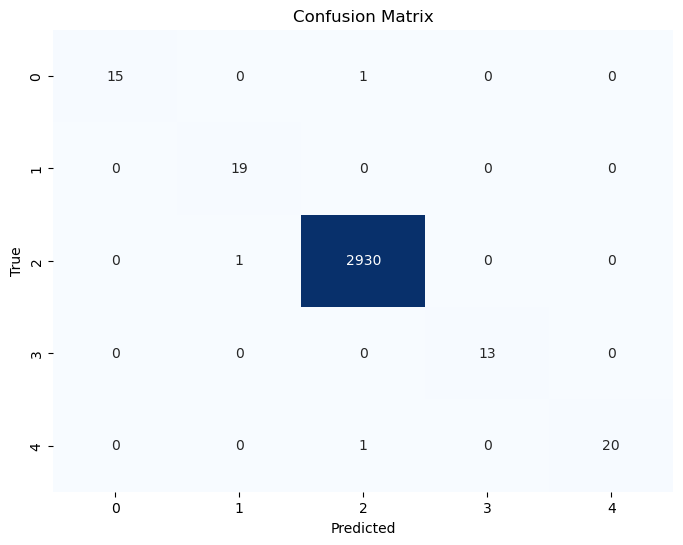

In [ ]:
# 오차행렬 시각화

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 오차 행렬 계산
conf_matrix = confusion_matrix(y_test, y_pred)

# Seaborn을 사용하여 표현
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from joblib import dump, load


dump(rf_model, 'data/03.user_cluster_pred_final.joblib')

['user_cluster_pred_final.joblib']

# 전처리 과정 정리 및 row 하나에 적용될 수 있게 수정
- userID, user_skintype, user_trouble, prd_name이 모두 입력되었다고 가정
- main_prd_ingredients는 product_info에서 추출
##### 그 이후 모델 예측을 위한 전처리
- 원핫인코딩: user_skintype, user_trouble, prd_ingredients
- Standard Scaling: user_skintype, user_trouble, prd_ingredients
- MCA: 326개로(70% 설명력)차원 축소

## 임의로 유저 정보 생성
- userID, user_skintype, user_trouble, prd_name은 임의 추가
- main_prd_ingredients: product_info 데이터에서 끌어오기

In [ ]:
import pandas as pd
prd_names = ",".join(['그린 카밍 세럼','그린티 히알루론산 로션','내추럴 리페어 세럼','레티노콜라겐 저분자 300 크림'])
new_user = {'userID':'F0000','user_skintype':'건성','user_trouble':'트러블','prd_name': prd_names}
new_user = pd.DataFrame(data=new_user,index=[0])
new_user

,userID,user_skintype,user_trouble,prd_name
0,F0000,건성,트러블,"그린 카밍 세럼,그린티 히알루론산 로션,내추럴 리페어 세럼,레티노콜라겐 저분자 30..."


### product_info 끌어오기

In [ ]:
import pymysql

conn = pymysql.connect(host='localhost',user='root',password='apple123!!',db='beaulol')

# conn=(
#     host='localhost',
#     user='root',
#     password='1111',
#     db='beaulol',
#     charset='utf8'
# )

product_info = pd.read_sql("SELECT prd_name, prd_brand, prd_ingredients, prd_category FROM product_info", conn)
product_info

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3111847380.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_info = pd.read_sql("SELECT prd_name, prd_brand, prd_ingredients, prd_category FROM product_info", conn)


,prd_name,prd_brand,prd_ingredients,prd_category
0,10% 나이아신아마이드 부스터 앰플,폴라초이스,"정제수, 나이아신아마이드, 아세틸글루코사민, 아스코빌글루코사이드, 부틸렌글라이콜, ...",세럼
1,1025 독도 로션,라운드랩,"정제수, 글리세린, 퀸즈랜드넛오일, 1,2-헥산다이올, 펜틸렌글라이콜, 호호바에스터...",로션
2,1025 독도 토너,라운드랩,"정제수, 부틸렌글라이콜, 글리세린, 펜틸렌글라이콜, 프로판다이올, 아이리쉬모스추출물...",스킨토너
3,"11년간, 1등 잡티세럼",아이소이,"정제수, 다마스크장미꽃수, 글리세린, 에탄올,알부틴, 베타인, 트레할로오스, 다마스...",세럼
4,1번 진정 맑게담은 청초토너,넘버즈인,"병풀추출물, 약모밀추출물, 감초뿌리추출물, 1,2-헥산다이올, 다이프로필렌글라이콜,...",스킨토너
...,...,...,...,...
432,히알루로닉 에센스,로벡틴,"정제수, 글리세린, 메틸글루세스-20, 펜틸렌글라이콜, 부틸렌글라이콜, 나이아신아마...",세럼
433,히알루론산 레이어 물톡스 앰플,메디필,"정제수, 프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1,2-헥...",세럼
434,히알루론산 레이어 물톡스 앰플 더블 기획,메디필,"정제수, 프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1,2-헥...",세럼
435,힐러 턴오버 액티브 크림,리쥬란,"정제수, 글리세린, 부틸렌글라이콜, 메틸하이드로제네이티드로지네이트, 다이프로필렌글라...",크림


In [ ]:
product_info_df = product_info.copy()

In [ ]:
# # 4개 성분 이름 안 콤마를 슬래쉬(/)로 변경
# product_info_df['prd_ingredients'] = product_info_df['prd_ingredients'].str.replace('1,2-헥산다이올', '1/2-헥산다이올')
# product_info_df['prd_ingredients'] = product_info_df['prd_ingredients'].str.replace('2-올레아미도-1,3-옥타데칸다이올', '2-올레아미도-1/3-옥타데칸다이올')
# product_info_df['prd_ingredients'] = product_info_df['prd_ingredients'].str.replace('2,3-부탄다이올', '2/3-부탄다이올')
# product_info_df['prd_ingredients'] = product_info_df['prd_ingredients'].str.replace('2,4-다이메틸-3-사이클로헥신카복스알데하이드', '2/4-다이메틸-3-사이클로헥신카복스알데하이드')

# # 우선 구분자 수정> ', '로
# import re
# product_info_df['prd_ingredients'] = product_info_df['prd_ingredients'].apply(lambda x: re.sub(r'\. |@|\*\.|\*,|\*@|\*', ', ', x))
# product_info_df['prd_ingredients'] = product_info_df['prd_ingredients'].apply(lambda x: re.sub(r'\(.*?\)', '', x))

In [ ]:
# nd_product_info_df = product_info_df[product_info_df['prd_ingredients'].str.split(', ').apply(len) == 1]
# display(product_info_df[product_info_df['prd_ingredients'].str.split(', ').apply(len) == 1])
# nd_product_info_df['prd_ingredients'] = nd_product_info_df['prd_ingredients'].apply(lambda x: re.sub(r' |,',', ',x))

# remove_index = [36,44,146,147,236,237,240,278,312,326,327,349,401,413,430]
# for i in remove_index:
#     nd_product_info_df.loc[i,'prd_ingredients'] = '-'
#     nd_product_info_df
# for idx in nd_product_info_df.index:
#     product_info_df.at[idx, 'prd_ingredients'] = nd_product_info_df.at[idx, 'prd_ingredients']

In [ ]:
# # 정제수 포함 하기라도 하면 다 제거해라. (■ 정제수, 혹은 정제수,로 연결된 것)
# product_info_df['prd_ingredients'] = product_info_df['prd_ingredients'].apply(lambda x: ', '.join([ingredient.strip() for \
#     ingredient in x.split(', ') if '정제수' not in ingredient]))
# product_info_df.info()

### product_info DB 전처리 통합본

In [ ]:

def product_info_prep(dataframe):
    # 4개 성분 이름 안 콤마를 슬래쉬(/)로 변경
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('1,2-헥산다이올', '1/2-헥산다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2-올레아미도-1,3-옥타데칸다이올', '2-올레아미도-1/3-옥타데칸다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2,3-부탄다이올', '2/3-부탄다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2,4-다이메틸-3-사이클로헥신카복스알데하이드', '2/4-다이메틸-3-사이클로헥신카복스알데하이드')

    # 우선 구분자 수정> ', '로
    import re
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: re.sub(r'\. |@|\*\.|\*,|\*@|\*', ', ', x))
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: re.sub(r'\(.*?\)', '', x))

    nd_dataframe = dataframe[dataframe['prd_ingredients'].str.split(', ').apply(len) == 1]
    display(dataframe[dataframe['prd_ingredients'].str.split(', ').apply(len) == 1])
    nd_dataframe['prd_ingredients'] = nd_dataframe['prd_ingredients'].apply(lambda x: re.sub(r' |,',', ',x))

    remove_index = [36,44,146,147,236,237,240,278,312,326,327,349,401,413,430]
    for i in remove_index:
        nd_dataframe.loc[i,'prd_ingredients'] = '-'
        nd_dataframe
    for idx in nd_dataframe.index:
        dataframe.at[idx, 'prd_ingredients'] = nd_dataframe.at[idx, 'prd_ingredients']

    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: ', '.join([ingredient.strip() for \
    ingredient in x.split(', ') if '정제수' not in ingredient]))
    product_info_df.info()


    return dataframe


In [ ]:
prep_product_info = product_info_prep(product_info)
prep_product_info

,prd_name,prd_brand,prd_ingredients,prd_category
20,NEW 시카플라스트 밤B5+,라로슈포제,정제수 하이드로제네이티드폴리아이소부텐 다이메티콘 글리세린 시어버터 판테놀 옥수수전분...,크림
23,갈락토미세스 발효 에센스,믹순,갈락토미세스발효여과물 100%,세럼
35,나이아신아마이드+모과추출물 세럼,마리엔메이,"모과추출물,글리세레스-26,나이아신아마이드,1/2-헥산다이올,알지닌,카보머,에틸헥실...",세럼
36,낫츠 센텔라스카 연고 일랑일랑 15g,낫츠,-,크림
44,다이브인 저분자 히알루론산 크림,토리든,화장품법에 따라 기재해야 하는 모든 성분,크림
...,...,...,...,...
413,하이드라 크림 앰플 더블 기획,나인위시스,-하이드라 크림앰플,세럼
421,하이알루론 부스팅에센스,유세린,"정제수,변성알코올,글리세린,부틸렌글라이콜,판테놀,피이지-40하이드로제네이티드캐스터오...",세럼
423,허니 세럼,아임프롬,"글리세린,정제수,부틸렌글라이콜,다이메티콘,사이클로펜타실록세인,나이아신아마이드,피이지...",세럼
428,히아루론산 토너 더블 기획,이즈앤트리,"정제수,프로판다이올,1/2-헥산다이올,소듐하이알루로네이트,트레할로오스,소듐피씨에이,...",스킨토너


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prd_name         437 non-null    object
 1   prd_brand        437 non-null    object
 2   prd_ingredients  437 non-null    object
 3   prd_category     437 non-null    object
dtypes: object(4)
memory usage: 13.8+ KB


/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/1711554004.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd_dataframe['prd_ingredients'] = nd_dataframe['prd_ingredients'].apply(lambda x: re.sub(r' |,',', ',x))


,prd_name,prd_brand,prd_ingredients,prd_category
0,10% 나이아신아마이드 부스터 앰플,폴라초이스,"나이아신아마이드, 아세틸글루코사민, 아스코빌글루코사이드, 부틸렌글라이콜, 포스포리피...",세럼
1,1025 독도 로션,라운드랩,"글리세린, 퀸즈랜드넛오일, 1/2-헥산다이올, 펜틸렌글라이콜, 호호바에스터, 아이리...",로션
2,1025 독도 토너,라운드랩,"부틸렌글라이콜, 글리세린, 펜틸렌글라이콜, 프로판다이올, 아이리쉬모스추출물, 사탕수...",스킨토너
3,"11년간, 1등 잡티세럼",아이소이,"다마스크장미꽃수, 글리세린, 에탄올,알부틴, 베타인, 트레할로오스, 다마스크장미꽃오...",세럼
4,1번 진정 맑게담은 청초토너,넘버즈인,"병풀추출물, 약모밀추출물, 감초뿌리추출물, 1/2-헥산다이올, 다이프로필렌글라이콜,...",스킨토너
...,...,...,...,...
432,히알루로닉 에센스,로벡틴,"글리세린, 메틸글루세스-20, 펜틸렌글라이콜, 부틸렌글라이콜, 나이아신아마이드, 솔...",세럼
433,히알루론산 레이어 물톡스 앰플,메디필,"프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1/2-헥산다이올,...",세럼
434,히알루론산 레이어 물톡스 앰플 더블 기획,메디필,"프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1/2-헥산다이올,...",세럼
435,힐러 턴오버 액티브 크림,리쥬란,"글리세린, 부틸렌글라이콜, 메틸하이드로제네이티드로지네이트, 다이프로필렌글라이콜, 다...",크림


In [ ]:
prep_product_info

,prd_name,prd_brand,prd_ingredients,prd_category
0,10% 나이아신아마이드 부스터 앰플,폴라초이스,"나이아신아마이드, 아세틸글루코사민, 아스코빌글루코사이드, 부틸렌글라이콜, 포스포리피...",세럼
1,1025 독도 로션,라운드랩,"글리세린, 퀸즈랜드넛오일, 1/2-헥산다이올, 펜틸렌글라이콜, 호호바에스터, 아이리...",로션
2,1025 독도 토너,라운드랩,"부틸렌글라이콜, 글리세린, 펜틸렌글라이콜, 프로판다이올, 아이리쉬모스추출물, 사탕수...",스킨토너
3,"11년간, 1등 잡티세럼",아이소이,"다마스크장미꽃수, 글리세린, 에탄올,알부틴, 베타인, 트레할로오스, 다마스크장미꽃오...",세럼
4,1번 진정 맑게담은 청초토너,넘버즈인,"병풀추출물, 약모밀추출물, 감초뿌리추출물, 1/2-헥산다이올, 다이프로필렌글라이콜,...",스킨토너
...,...,...,...,...
432,히알루로닉 에센스,로벡틴,"글리세린, 메틸글루세스-20, 펜틸렌글라이콜, 부틸렌글라이콜, 나이아신아마이드, 솔...",세럼
433,히알루론산 레이어 물톡스 앰플,메디필,"프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1/2-헥산다이올,...",세럼
434,히알루론산 레이어 물톡스 앰플 더블 기획,메디필,"프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1/2-헥산다이올,...",세럼
435,힐러 턴오버 액티브 크림,리쥬란,"글리세린, 부틸렌글라이콜, 메틸하이드로제네이티드로지네이트, 다이프로필렌글라이콜, 다...",크림


### 용매 제거

In [ ]:
solvent_df = pd.read_sql("SELECT ingredient_kor FROM solvent", conn)
solvent_df

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/2889827213.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  solvent_df = pd.read_sql("SELECT ingredient_kor FROM solvent", conn)


,ingredient_kor
0,사이클로테트라실록세인
1,테트라데센
2,메틸트라이메티콘
3,옥타데케인
4,피이지-18
...,...
596,난각막추출물
597,o-사이멘-5-올
598,포타슘메타바이설파이트
599,하이드로제네이티드탈로우트라이모늄클로라이드


In [ ]:
# 솔벤트도 한 성분내에 콤마있을경우, 슬래시로 변경
solvent_df['ingredient_kor'] = solvent_df['ingredient_kor'].str.replace(',','/')

# 솔벤트 리스트 정의
solvent_lst = solvent_df['ingredient_kor'].tolist()
solvent_lst

['사이클로테트라실록세인',
 '테트라데센',
 '메틸트라이메티콘',
 '옥타데케인',
 '피이지-18',
 '사이클로헥사실록세인',
 '피이지/피피지-6/2코폴리머',
 '에틸에터',
 '헥산다이올',
 '다이부틸아디페이트',
 '다이메틸아이소소바이드',
 '하이드로제네이티드폴리데센',
 '피피지-55글리세릴에터',
 '퍼플루오로퍼하이드로페난트렌',
 '아이소옥탄',
 '퍼플루오로다이메틸사이클로헥산',
 '페녹시프로판다이올',
 '다이옥솔레인',
 '사이클로펜타실록세인',
 '3-메톡시부탄올',
 '트라이부틸시트레이트',
 '상어간오일',
 '다이에틸옥살레이트',
 '헥실렌글라이콜',
 '다이에톡시에틸석시네이트',
 '에틸아세테이트',
 '트라이아세틴',
 '트라이에틸포스페이트',
 '벤질벤조에이트',
 '프로필렌글라이콜부틸에터',
 '다이메틸석시네이트',
 '엠이케이',
 '글리세레스-18벤조에이트',
 '자일렌',
 '펜타플루오로프로판',
 '메톡시아이소프로판올',
 '스쿠알렌',
 '다이아이소옥틸아디페이트',
 '피피지-3',
 'C16-17알킬벤조에이트',
 '미비케이',
 'C10-12알케인/사이클로알케인',
 '사이클로헥산온',
 '다이-피피지-3미리스틸에터아디페이트',
 '피이지/피피지-200/70코폴리머',
 'C14-19알케인',
 '톨루엔',
 '솔베스-30',
 '테트라하이드로퍼퓨릴아세테이트',
 'C10-18트라이글리세라이즈',
 '다이에틸세바케이트',
 '다이부틸옥살레이트',
 '아이소부틸벤조에이트',
 '퍼플루오로데칼린',
 '옥틸도데칸올',
 '다이메틸프탈레이트',
 '피이지-4',
 '피이지-240',
 '퍼플루오로퍼하이드로벤질테트랄린',
 '글리세레스-7락테이트',
 '메틸부텐',
 '피피지-7',
 '피이지/피피지-25/30코폴리머',
 '피이지-135',
 '에틸피롤리돈',
 '스테아릴벤조에이트',
 '다이트라이데실아디페이트',
 '데카플루오로펜탄',
 '사이클로헵타실록세인',
 '글라이콜',
 '스타이렌',
 '피이지-60

In [ ]:
# 'main_prd_ingredients' 열 추가 및 초기화
product_info_df = prep_product_info.copy()
product_info_df['main_prd_ingredients'] = ''

# 'prd_ingredients' 열의 문자열에서 'solvent_lst'의 요소를 제거
product_info_df['main_prd_ingredients'] = product_info_df['prd_ingredients'].apply(lambda x:\
    ', '.join([item.strip() for item in x.split(', ') if item not in solvent_lst]))

# 결과 확인
print(product_info_df['main_prd_ingredients'])

0      나이아신아마이드, 아세틸글루코사민, 아스코빌글루코사이드, 포스포리피드, 소듐하이알루...
1      퀸즈랜드넛오일, 호호바에스터, 아이리쉬모스추출물, 사탕수수추출물, 해수, 하이알루로...
2      아이리쉬모스추출물, 사탕수수추출물, 해수, 프로테아제, 베타인, 판테놀, 에틸헥실글...
3      다마스크장미꽃수, 에탄올,알부틴, 베타인, 트레할로오스, 다마스크장미꽃오일, 비타민...
4      병풀추출물, 약모밀추출물, 감초뿌리추출물, 프로판다이올,부틸렌글라이콜, 히아신스전초...
                             ...                        
432    메틸글루세스-20, 나이아신아마이드, 솔비톨, 아데노신, 카페인, 소듐하이알루로네이...
433    나이아신아마이드, 다시마추출물, 한련초잎추출물, 병풀뿌리추출물, 에난티아 클로란타껍...
434    나이아신아마이드, 다시마추출물, 한련초잎추출물, 병풀뿌리추출물, 에난티아 클로란타껍...
435    메틸하이드로제네이티드로지네이트, 다이스타치포스페이트, 다이카프릴릴카보네이트, 세테아...
436    서양산딸기잎추출물, 스페인감초뿌리추출물, 포트마리골드꽃추출물, 알로에베라잎즙, 로우...
Name: main_prd_ingredients, Length: 437, dtype: object


### 용매 제거 통합

In [ ]:

def product_info_prep(dataframe):
    # 4개 성분 이름 안 콤마를 슬래쉬(/)로 변경
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('1,2-헥산다이올', '1/2-헥산다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2-올레아미도-1,3-옥타데칸다이올', '2-올레아미도-1/3-옥타데칸다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2,3-부탄다이올', '2/3-부탄다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2,4-다이메틸-3-사이클로헥신카복스알데하이드', '2/4-다이메틸-3-사이클로헥신카복스알데하이드')

    # 우선 구분자 수정> ', '로
    import re
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: re.sub(r'\. |@|\*\.|\*,|\*@|\*', ', ', x))
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: re.sub(r'\(.*?\)', '', x))

    nd_dataframe = dataframe[dataframe['prd_ingredients'].str.split(', ').apply(len) == 1]
    display(dataframe[dataframe['prd_ingredients'].str.split(', ').apply(len) == 1])
    nd_dataframe['prd_ingredients'] = nd_dataframe['prd_ingredients'].apply(lambda x: re.sub(r' |,',', ',x))

    remove_index = [36,44,146,147,236,237,240,278,312,326,327,349,401,413,430]
    for i in remove_index:
        nd_dataframe.loc[i,'prd_ingredients'] = '-'
        nd_dataframe
    for idx in nd_dataframe.index:
        dataframe.at[idx, 'prd_ingredients'] = nd_dataframe.at[idx, 'prd_ingredients']

    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: ', '.join([ingredient.strip() for \
    ingredient in x.split(', ') if '정제수' not in ingredient]))
    product_info_df.info()


    return dataframe


def remove_solvent(dataframe,solvent=solvent_lst):
    dataframe['main_prd_ingredients'] = ''
    dataframe['main_prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x:\
    ', '.join([item.strip() for item in x.split(', ') if item not in solvent_lst]))
    return dataframe

In [ ]:
prep_product_info = remove_solvent(prep_product_info)
prep_product_info

,prd_name,prd_brand,prd_ingredients,prd_category,main_prd_ingredients
0,10% 나이아신아마이드 부스터 앰플,폴라초이스,"나이아신아마이드, 아세틸글루코사민, 아스코빌글루코사이드, 부틸렌글라이콜, 포스포리피...",세럼,"나이아신아마이드, 아세틸글루코사민, 아스코빌글루코사이드, 포스포리피드, 소듐하이알루..."
1,1025 독도 로션,라운드랩,"글리세린, 퀸즈랜드넛오일, 1/2-헥산다이올, 펜틸렌글라이콜, 호호바에스터, 아이리...",로션,"퀸즈랜드넛오일, 호호바에스터, 아이리쉬모스추출물, 사탕수수추출물, 해수, 하이알루로..."
2,1025 독도 토너,라운드랩,"부틸렌글라이콜, 글리세린, 펜틸렌글라이콜, 프로판다이올, 아이리쉬모스추출물, 사탕수...",스킨토너,"아이리쉬모스추출물, 사탕수수추출물, 해수, 프로테아제, 베타인, 판테놀, 에틸헥실글..."
3,"11년간, 1등 잡티세럼",아이소이,"다마스크장미꽃수, 글리세린, 에탄올,알부틴, 베타인, 트레할로오스, 다마스크장미꽃오...",세럼,"다마스크장미꽃수, 에탄올,알부틴, 베타인, 트레할로오스, 다마스크장미꽃오일, 비타민..."
4,1번 진정 맑게담은 청초토너,넘버즈인,"병풀추출물, 약모밀추출물, 감초뿌리추출물, 1/2-헥산다이올, 다이프로필렌글라이콜,...",스킨토너,"병풀추출물, 약모밀추출물, 감초뿌리추출물, 프로판다이올,부틸렌글라이콜, 히아신스전초..."
...,...,...,...,...,...
432,히알루로닉 에센스,로벡틴,"글리세린, 메틸글루세스-20, 펜틸렌글라이콜, 부틸렌글라이콜, 나이아신아마이드, 솔...",세럼,"메틸글루세스-20, 나이아신아마이드, 솔비톨, 아데노신, 카페인, 소듐하이알루로네이..."
433,히알루론산 레이어 물톡스 앰플,메디필,"프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1/2-헥산다이올,...",세럼,"나이아신아마이드, 다시마추출물, 한련초잎추출물, 병풀뿌리추출물, 에난티아 클로란타껍..."
434,히알루론산 레이어 물톡스 앰플 더블 기획,메디필,"프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1/2-헥산다이올,...",세럼,"나이아신아마이드, 다시마추출물, 한련초잎추출물, 병풀뿌리추출물, 에난티아 클로란타껍..."
435,힐러 턴오버 액티브 크림,리쥬란,"글리세린, 부틸렌글라이콜, 메틸하이드로제네이티드로지네이트, 다이프로필렌글라이콜, 다...",크림,"메틸하이드로제네이티드로지네이트, 다이스타치포스페이트, 다이카프릴릴카보네이트, 세테아..."


### 화장품 등록 DB -> DB 등록 없이 코드로만 데이터 임의 생성

In [ ]:
brands= ['비긴스','이니스프리','휘게','CKD']
prd_names = ['그린 카밍 세럼','그린티 히알루론산 로션','내추럴 리페어 세럼','레티노콜라겐 저분자 300 크림']
new_customer_regis = pd.DataFrame()
idx = 0
for brand,prd_name in zip(brands,prd_names):
    new_customer_regis.loc[idx,'userID']='F0000'
    new_customer_regis.loc[idx,'prd_brand'] = brand
    new_customer_regis.loc[idx,'prd_name'] = prd_name
    idx += 1
new_customer_regis

,userID,prd_brand,prd_name
0,F0000,비긴스,그린 카밍 세럼
1,F0000,이니스프리,그린티 히알루론산 로션
2,F0000,휘게,내추럴 리페어 세럼
3,F0000,CKD,레티노콜라겐 저분자 300 크림


In [ ]:
customer_regis_df = pd.merge(new_customer_regis, prep_product_info[['prd_name','main_prd_ingredients']], \
    how='left', on='prd_name' )
customer_regis_df       # 들어갔다 치자

,userID,prd_brand,prd_name,main_prd_ingredients
0,F0000,비긴스,그린 카밍 세럼,"디프로필렌글라이콜, 프로판디올, 나이아신아마이드, 1,2-헥산디올, 판테놀, 비피다..."
1,F0000,이니스프리,그린티 히알루론산 로션,"펜타에리스리틸테트라에틸헥사노에이트, 다이아이소스테아릴말레이트, 나이아신아마이드, C..."
2,F0000,휘게,내추럴 리페어 세럼,"홍삼추출물, 나이아신아마이드, 시메티콘, 판테놀, 겔리듐 카르틸라기네움추출물, 다시..."
3,F0000,CKD,레티노콜라겐 저분자 300 크림,"수용성콜라겐, 펜타에리스리틸테트라에틸헥사노에이트, 글리세릴스테아레이트, 세테아릴알코..."


* 임의 데이터

In [ ]:
data = {'userID':'F0000','user_skintype' : '건성','user_trouble' : '트러블'}
new_user_info = pd.DataFrame(data=data,index=[0])
new_user_info

,userID,user_skintype,user_trouble
0,F0000,건성,트러블


In [ ]:
sub_df = customer_regis_df.groupby('userID')['main_prd_ingredients'].apply(lambda x: ', '.join(x)).reset_index()
sub_df2 = customer_regis_df.groupby('userID')['prd_name'].agg(lambda x: ', '.join(x)).reset_index()
new_user_info = pd.merge(new_user_info,sub_df, how='left', on='userID')
new_user_info = pd.merge(new_user_info, sub_df2, how = 'left', on='userID')

In [ ]:
new_user_info = pd.merge(new_user_info,sub_df, how='left', on='userID')
new_user_info = pd.merge(new_user_info, sub_df2, how = 'left', on='userID')

In [ ]:
new_user_info

,userID,user_skintype,user_trouble,main_prd_ingredients_x,prd_name_x,main_prd_ingredients_y,prd_name_y
0,F0000,건성,트러블,"디프로필렌글라이콜, 프로판디올, 나이아신아마이드, 1,2-헥산디올, 판테놀, 비피다...","그린 카밍 세럼, 그린티 히알루론산 로션, 내추럴 리페어 세럼, 레티노콜라겐 저분자...","디프로필렌글라이콜, 프로판디올, 나이아신아마이드, 1,2-헥산디올, 판테놀, 비피다...","그린 카밍 세럼, 그린티 히알루론산 로션, 내추럴 리페어 세럼, 레티노콜라겐 저분자..."


## userID로 해당 유저 정보 가져오기

In [ ]:
def get_user_info(userID):
    conn = pymysql.connect(host='localhost',user='root',password='apple123!!',db='beaulol')
    with conn:
        user_info = pd.read_sql(f'select * from customer_type where userID = "{userID}";',conn)[['userID','user_skintype','user_trouble']]
    return user_info

In [ ]:
def product_info_prep():
    conn = pymysql.connect(host='localhost',user='root',password='apple123!!',db='beaulol')
    with conn:
        dataframe = pd.read_sql("SELECT prd_name, prd_brand, prd_ingredients, prd_category FROM product_info", conn)

    # 4개 성분 이름 안 콤마를 슬래쉬(/)로 변경
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('1,2-헥산다이올', '1/2-헥산다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2-올레아미도-1,3-옥타데칸다이올', '2-올레아미도-1/3-옥타데칸다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2,3-부탄다이올', '2/3-부탄다이올')
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].str.replace('2,4-다이메틸-3-사이클로헥신카복스알데하이드', '2/4-다이메틸-3-사이클로헥신카복스알데하이드')

    # 우선 구분자 수정> ', '로
    import re
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: re.sub(r'\. |@|\*\.|\*,|\*@|\*', ', ', x))
    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: re.sub(r'\(.*?\)', '', x))

    nd_dataframe = dataframe[dataframe['prd_ingredients'].str.split(', ').apply(len) == 1]
    display(dataframe[dataframe['prd_ingredients'].str.split(', ').apply(len) == 1])
    nd_dataframe['prd_ingredients'] = nd_dataframe['prd_ingredients'].apply(lambda x: re.sub(r' |,',', ',x))

    remove_index = [36,44,146,147,236,237,240,278,312,326,327,349,401,413,430]
    for i in remove_index:
        nd_dataframe.loc[i,'prd_ingredients'] = '-'
        nd_dataframe
    for idx in nd_dataframe.index:
        dataframe.at[idx, 'prd_ingredients'] = nd_dataframe.at[idx, 'prd_ingredients']

    dataframe['prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x: ', '.join([ingredient.strip() for \
    ingredient in x.split(', ') if '정제수' not in ingredient]))
    product_info_df.info()


    return dataframe


# 소정 1차 전처리 파일 적용

In [ ]:
product_info_df = pd.read_excel('./data/03.머신러닝_02클러스터링_전처리_전처리중간수정본.xlsx',index_col=0)
product_info_df

,prd_name,prd_brand,prd_ingredients,prd_category,main_prd_ingredients
0,10% 나이아신아마이드 부스터 앰플,폴라초이스,"나이아신아마이드, 아세틸글루코사민, 아스코빌글루코사이드, 부틸렌글라이콜, 포스포리피...",세럼,"나이아신아마이드, 아세틸글루코사민, 아스코빌글루코사이드, 포스포리피드, 소듐하이알루..."
1,1025 독도 로션,라운드랩,"글리세린, 퀸즈랜드넛오일, 1/2-헥산다이올, 펜틸렌글라이콜, 호호바에스터, 아이리...",로션,"퀸즈랜드넛오일, 호호바에스터, 아이리쉬모스추출물, 사탕수수추출물, 해수, 하이알루로..."
2,1025 독도 토너,라운드랩,"부틸렌글라이콜, 글리세린, 펜틸렌글라이콜, 프로판다이올, 아이리쉬모스추출물, 사탕수...",스킨토너,"아이리쉬모스추출물, 사탕수수추출물, 해수, 프로테아제, 베타인, 판테놀, 에틸헥실글..."
3,"11년간, 1등 잡티세럼",아이소이,"다마스크장미꽃수, 글리세린, 에탄올, 알부틴, 베타인, 트레할로오스, 다마스크장미꽃...",세럼,"다마스크장미꽃수, 에탄올, 알부틴, 베타인, 트레할로오스, 다마스크장미꽃오일, 비타..."
4,1번 진정 맑게담은 청초토너,넘버즈인,"병풀추출물, 약모밀추출물, 감초뿌리추출물, 1/2-헥산다이올, 다이프로필렌글라이콜,...",스킨토너,"병풀추출물, 약모밀추출물, 감초뿌리추출물, 프로판다이올, 부틸렌글라이콜, 히아신스전..."
...,...,...,...,...,...
432,히알루로닉 에센스,로벡틴,"글리세린, 메틸글루세스-20, 펜틸렌글라이콜, 부틸렌글라이콜, 나이아신아마이드, 솔...",세럼,"메틸글루세스-20, 나이아신아마이드, 솔비톨, 아데노신, 카페인, 소듐하이알루로네이..."
433,히알루론산 레이어 물톡스 앰플,메디필,"프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1/2-헥산다이올,...",세럼,"나이아신아마이드, 다시마추출물, 한련초잎추출물, 병풀뿌리추출물, 에난티아 클로란타껍..."
434,히알루론산 레이어 물톡스 앰플 더블 기획,메디필,"프로판다이올, 글리세린, 다이프로필렌글라이콜, 메틸프로판다이올, 1/2-헥산다이올,...",세럼,"나이아신아마이드, 다시마추출물, 한련초잎추출물, 병풀뿌리추출물, 에난티아 클로란타껍..."
435,힐러 턴오버 액티브 크림,리쥬란,"글리세린, 부틸렌글라이콜, 메틸하이드로제네이티드로지네이트, 다이프로필렌글라이콜, 다...",크림,"메틸하이드로제네이티드로지네이트, 다이스타치포스페이트, 다이카프릴릴카보네이트, 세테아..."


In [ ]:
def remove_solvent(dataframe,solvent=solvent_lst):
    dataframe = product_info_prep()
    dataframe['main_prd_ingredients'] = ''
    dataframe['main_prd_ingredients'] = dataframe['prd_ingredients'].apply(lambda x:\
    ', '.join([item.strip() for item in x.split(', ') if item not in solvent_lst]))
    return dataframe

## 1차 통합 : get_user_regis

In [ ]:
def get_user_regis(userID):
    # user_info : 예측할 유저 기본 정보(유저아이디, 피부타입, 피부고민) 가져오기
    user_info = get_user_info(userID)

    # user_regis : 유저 등록 화장품 정보 가져오기(필터 = 유저아이디)
    conn = pymysql.connect(host='localhost',user='root',password='apple123!!',db='beaulol')
    with conn:
        customer_regis_df = pd.read_sql(f'select * from customer_regis where userID = "{userID}";',conn)[['userID','prd_brand','prd_name']]
    user_regis = customer_regis_df.loc[customer_regis_df['userID']==userID]

    ## 유저 기본 정보 + 유저 화장품 전체 목록 + 유저 화장품 성분 전체 목록

    #성분이 들어있는 화장품 목록
    # prep_product_info = product_info_prep()                 # 단순 화장품 목록에서 성분 이름 전처리
    prep_product_info = pd.read_excel('./data/03.머신러닝_02클러스터링_전처리_전처리중간수정본.xlsx',index_col=0)       #수기수정파일
    prep_product_info = remove_solvent(prep_product_info)   # 성분들 중 불필요 성분 제거

    # new_user_regis : 유저 등록 화장품 정보를 기준으로 화장품 전체 목록 + 유저 화장품 성분 전체 목록 취합
    new_user_regis = pd.merge(user_regis, prep_product_info[['prd_name','main_prd_ingredients']], \
    how='left', on='prd_name' )
    sub_df = new_user_regis.groupby('userID')['main_prd_ingredients'].apply(lambda x: ', '.join(x)).reset_index()
    sub_df2 = new_user_regis.groupby('userID')['prd_name'].agg(lambda x: ', '.join(x)).reset_index()
    new_user_regis = pd.merge(user_info, sub_df, how='left', on='userID')
    new_user_regis = pd.merge(new_user_regis, sub_df2, how = 'left', on='userID')

    return new_user_regis

In [ ]:
new_user_info = get_user_regis("F0002")
new_user_info

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3874200117.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_info = pd.read_sql(f'select * from customer_type where userID = "{userID}";',conn)[['userID','user_skintype','user_trouble']]
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3484479980.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_regis_df = pd.read_sql(f'select * from customer_regis where userID = "{userID}";',conn)[['userID','prd_brand','prd_name']]
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3533604459.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database st

,prd_name,prd_brand,prd_ingredients,prd_category
20,NEW 시카플라스트 밤B5+,라로슈포제,정제수 하이드로제네이티드폴리아이소부텐 다이메티콘 글리세린 시어버터 판테놀 옥수수전분...,크림
23,갈락토미세스 발효 에센스,믹순,갈락토미세스발효여과물 100%,세럼
35,나이아신아마이드+모과추출물 세럼,마리엔메이,"모과추출물,글리세레스-26,나이아신아마이드,1/2-헥산다이올,알지닌,카보머,에틸헥실...",세럼
36,낫츠 센텔라스카 연고 일랑일랑 15g,낫츠,-,크림
44,다이브인 저분자 히알루론산 크림,토리든,화장품법에 따라 기재해야 하는 모든 성분,크림
...,...,...,...,...
413,하이드라 크림 앰플 더블 기획,나인위시스,-하이드라 크림앰플,세럼
421,하이알루론 부스팅에센스,유세린,"정제수,변성알코올,글리세린,부틸렌글라이콜,판테놀,피이지-40하이드로제네이티드캐스터오...",세럼
423,허니 세럼,아임프롬,"글리세린,정제수,부틸렌글라이콜,다이메티콘,사이클로펜타실록세인,나이아신아마이드,피이지...",세럼
428,히아루론산 토너 더블 기획,이즈앤트리,"정제수,프로판다이올,1/2-헥산다이올,소듐하이알루로네이트,트레할로오스,소듐피씨에이,...",스킨토너


<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 436
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prd_name              437 non-null    object
 1   prd_brand             437 non-null    object
 2   prd_ingredients       436 non-null    object
 3   prd_category          437 non-null    object
 4   main_prd_ingredients  436 non-null    object
dtypes: object(5)
memory usage: 20.5+ KB


/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3533604459.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd_dataframe['prd_ingredients'] = nd_dataframe['prd_ingredients'].apply(lambda x: re.sub(r' |,',', ',x))


,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토..."


# 최종 통합: new_user_preprocessed
    => 총 칼럼 수 1757
+ userID
+ X: (skintype 5개 onehotencoding + trouble 6개 onehotencoding + 성분 1744개 onehotencoding) : 1756

-> 예측 모델 훈련에 쓰인 데이터프레임에서 y(label) 열 제외
    

In [ ]:
def get_user_data(dataframe):
    userID = dataframe.loc[0,'userID']
    skintype = dataframe.loc[0,'user_skintype']
    trouble = dataframe.loc[0,'user_trouble']
    user_ingredients = dataframe.loc[0,'main_prd_ingredients']
    user_products = dataframe.loc[0,'prd_name']
    return userID,skintype,trouble,user_ingredients,user_products

In [ ]:
userID,skintype,trouble,user_ingredients,user_products = get_user_data(new_user_info)
print(userID,skintype,trouble)
print(user_products)
print(user_ingredients)

F0002 건성 민감성/아토피
아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토너, 트릭세라 로션, 아토베리어365 하이드로 수딩크림
병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추출물, 한련초잎추출물, 버지니아풍년화추출물, 티트리잎추출물, 약모밀추출물, 국화추출물, 연꽃꽃추출물, 라벤더꽃추출물, 마돈나백합꽃추출물, 서양수수꽃다리추출물, 장미꽃추출물, 녹차수, 베르가모트오일, 하이드로제네이티드레시틴, C12-14파레스-12, 알란토인, 마트리카리아꽃수, 잔탄검, 프룩토올리고사카라이드, 베타-글루칸, 하이드롤라이즈드하이알루로닉애씨드, 세라마이드엔피, 카보머, 팔미토일펜타펩타이드-4, 에틸헥실글리세린, 리날룰, 나이아신아마이드, 락토바실러스발효물, 암모늄폴리아크릴로일다이메틸타우레이트, 판테놀, 석시닉애씨드, 트로메타민, 다이포타슘글리시리제이트, 알란토인, 스테비아잎/줄기추출물, 다이소듐이디티에이, 덱스트린, 카카오씨추출물, 병풀추출물, 약모밀추출물, 워터민트추출물, 애플민트잎추출물, 스피어민트추출물, 아시아틱애씨드, 아시아티코사이드, 마데카식애씨드, 마데카소사이드, 흰버드나무껍질추출물, 아이리쉬모스추출물, 사탕수수추출물, 해수, 프로테아제, 베타인, 판테놀, 에틸헥실글리세린, 알란토인, 잔탄검, 다이소듐이디티에이, 아벤느온천수,글리세린,카프릴릭/카프릭트리글리세라이드,이소프로필팔미테이트,프로필렌글라이콜디카프레이트,글리세릴스테아레이트,피이지-100스테아레이트,미레스-3미리스테이트,토코페릴아세테이트,달맞이꽃오일,카프릴릴글라이콜,글라이신,펜틸람노사이드,아크릴레이트/C10-30알킬아크릴레이트크로스폴리머,카보머, 페닐트라이메티콘, 트레할로오스, 다이카프릴릴카보네이트, 암모늄아크릴로일다이메틸타우레이트/브이피코폴리머, 하이드로제네이티드레시틴, 하이드로제네이티드폴리아이소부텐, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸타우레이트코폴리머, 세테아릴알코올, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리머, 글리

In [ ]:
def get_user_data(dataframe):
    userID = dataframe.loc[0,'userID']
    skintype = dataframe.loc[0,'user_skintype']
    trouble = dataframe.loc[0,'user_trouble']
    user_ingredients = dataframe.loc[0,'main_prd_ingredients']
    user_products = dataframe.loc[0,'prd_name']
    return userID,skintype,trouble,user_ingredients,user_products

def new_user_skintype(skintype):
    train_data = pd.DataFrame({
    'user_skintype': ['건성','민감성','복합성','중성','지성']
})
    train_encoded = pd.get_dummies(train_data, columns=['user_skintype'])
    new_user = {'user_skintype': skintype}
    new_user_df = pd.DataFrame([new_user])
    new_user_encoded = pd.get_dummies(new_user_df, columns=['user_skintype'],dtype=int)

    for col in train_encoded.columns:
        if col not in new_user_encoded.columns:
            new_user_encoded[col] = 0
    return new_user_encoded

def new_user_trouble(trouble):
    train_data = pd.DataFrame({
    'user_trouble': ['민감성/아토피', '주름/탄력', '잡티/미백/홍조/다크서클', '각질', '트러블', '블랙헤드/모공'],
})
    train_encoded = pd.get_dummies(train_data,columns=['user_trouble'])
    new_user = {'user_trouble': trouble}
    new_user_df = pd.DataFrame([new_user])
    new_user_encoded = pd.get_dummies(new_user_df, columns=['user_trouble'],dtype=int)

    for col in train_encoded.columns:
        if col not in new_user_encoded.columns:
            new_user_encoded[col] = 0
    return new_user_encoded


In [ ]:
# 모든 성분 리스트 만들기 (중복 제거)
def all_ingredients_list():
    clustered_df = pd.read_csv('./data/03.머신러닝_02클러스터링_Kmeans_클러스터링완료본.csv',index_col=0,encoding='cp949')
    all_ingredients = []
    all_ingredients = list(set(ingredient.strip() for row in clustered_df['main_prd_ingredients'] for ingredient in row.split(', ')))
    all_ingredients.remove("")
    return all_ingredients

def count_ingredients(row, all_ingredients):
        ingredients = row['ingredients'].split(', ')
        ingredient_count = {ingredient: 0 for ingredient in all_ingredients}
        for ingredient in ingredients:
            ingredient = ingredient.strip()  # Remove any extra whitespace
            if ingredient in ingredient_count:
                ingredient_count[ingredient] += 1
        return ingredient_count

def ingredients_df(user_ingredients=user_ingredients):
    data = {
    'ingredients': user_ingredients
}
    df = pd.DataFrame(data,index=[0])
    return df

def ingredients_combined(df):
    all_ingredients = all_ingredients_list()

    ingredient_counts = df.apply(lambda row: count_ingredients(row, all_ingredients), axis=1)
    ingredient_df2 = pd.DataFrame(list(ingredient_counts))

    df_combined = pd.concat([df, ingredient_df2], axis=1)

    return df_combined


In [ ]:
def new_user_preprocessed(userID):
    user_info = get_user_regis(userID)
    userID,skintype,trouble,user_ingredients,user_products = get_user_data(new_user_info)

    new_skintype = new_user_skintype(skintype)
    new_trouble = new_user_trouble(trouble)

    df = ingredients_df(user_ingredients)
    new_ingredients = ingredients_combined(df)

    new_user_df = pd.DataFrame(data={'userID':userID},index=[0])
    new_user_df = pd.concat([new_user_df,new_skintype],axis=1)
    new_user_df = pd.concat([new_user_df,new_trouble],axis=1)
    new_user_df = pd.concat([new_user_df,new_ingredients],axis=1)
    new_user_df = new_user_df.drop('ingredients',axis=1)

    return new_user_df

In [ ]:
new_user_row = new_user_preprocessed("F0002")
new_user_row

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3874200117.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  user_info = pd.read_sql(f'select * from customer_type where userID = "{userID}";',conn)[['userID','user_skintype','user_trouble']]
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3484479980.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_regis_df = pd.read_sql(f'select * from customer_regis where userID = "{userID}";',conn)[['userID','prd_brand','prd_name']]
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3533604459.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database st

,prd_name,prd_brand,prd_ingredients,prd_category
20,NEW 시카플라스트 밤B5+,라로슈포제,정제수 하이드로제네이티드폴리아이소부텐 다이메티콘 글리세린 시어버터 판테놀 옥수수전분...,크림
23,갈락토미세스 발효 에센스,믹순,갈락토미세스발효여과물 100%,세럼
35,나이아신아마이드+모과추출물 세럼,마리엔메이,"모과추출물,글리세레스-26,나이아신아마이드,1/2-헥산다이올,알지닌,카보머,에틸헥실...",세럼
36,낫츠 센텔라스카 연고 일랑일랑 15g,낫츠,-,크림
44,다이브인 저분자 히알루론산 크림,토리든,화장품법에 따라 기재해야 하는 모든 성분,크림
...,...,...,...,...
413,하이드라 크림 앰플 더블 기획,나인위시스,-하이드라 크림앰플,세럼
421,하이알루론 부스팅에센스,유세린,"정제수,변성알코올,글리세린,부틸렌글라이콜,판테놀,피이지-40하이드로제네이티드캐스터오...",세럼
423,허니 세럼,아임프롬,"글리세린,정제수,부틸렌글라이콜,다이메티콘,사이클로펜타실록세인,나이아신아마이드,피이지...",세럼
428,히아루론산 토너 더블 기획,이즈앤트리,"정제수,프로판다이올,1/2-헥산다이올,소듐하이알루로네이트,트레할로오스,소듐피씨에이,...",스킨토너


/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_881/3533604459.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd_dataframe['prd_ingredients'] = nd_dataframe['prd_ingredients'].apply(lambda x: re.sub(r' |,',', ',x))


<class 'pandas.core.frame.DataFrame'>
Index: 437 entries, 0 to 436
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   prd_name              437 non-null    object
 1   prd_brand             437 non-null    object
 2   prd_ingredients       436 non-null    object
 3   prd_category          437 non-null    object
 4   main_prd_ingredients  436 non-null    object
dtypes: object(5)
memory usage: 20.5+ KB


,userID,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_민감성/아토피,user_trouble_각질,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,...,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2,label
0,F0002,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_user_row

,userID,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_민감성/아토피,user_trouble_각질,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,...,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2,label
0,F0002,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 신규 모델 예측

## 모델 호출

In [ ]:
rf_model = load('data/03.user_cluster_pred_final.joblib')

## 모델 학습 데이터와 신규 유저 칼럼 순서 맞추기

In [ ]:
new_col = df_pred_prep.columns.tolist()
new_col.remove('label')
new_user_pred = new_user_row[new_col]
new_user_pred

,userID,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,F0002,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = new_user_pred.iloc[:,1:]
X

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 신규 고객 클러스터 예측 결과

In [ ]:
y_pred = rf_model.predict(X)

y_pred

array([2])

In [ ]:
new_user_pred['cluster'] = y_pred[0]

In [ ]:
new_user_pred

,userID,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,...,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2,cluster
0,F0002,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
new_user_info['cluster'] = y_pred[0]
new_user_info


,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name,cluster
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",2
